In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Here customer id column has nothing to do so we will drop it

In [7]:
df.drop('customerID',inplace=True)

KeyError: "['customerID'] not found in axis"

In [8]:
df.drop['customerID',axis='columns',inplace=True]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1280173292.py, line 1)

In [9]:
df.drop('customerID',axis='columns',inplace=True)

#### Data Cleaning

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### TotalCharges must be a numerical column burt here it is object. Convert it to numeric

In [11]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### Theyare in string

In [13]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

#### Unable to parse string " " i.e some strings are containng spaces we need to drop them

In [14]:
pd.to_numeric(df.TotalCharges,errors='coerce')


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

#### We will pass this as  a Index for finding rows with emopty string

In [16]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df1 = df['TotalCharges'] != ' '

In [18]:
df1

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: TotalCharges, Length: 7043, dtype: bool

In [19]:
df1.shape

(7043,)

In [20]:
df1 = df[df.TotalCharges!=' ']

In [21]:
df1.shape

(7032, 20)

In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\narap\AppData\Local\Temp\ipykernel_29748\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [24]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Changed to float

#### 2) Check for unique values in each object column


In [25]:
for col in df1:
    print(df[col])

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64
0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes


In [27]:
def unique_col_values(df):
    for i in df:
        if df[i].dtypes == 'object':
            print(f'{i} : {df[i].unique()}')
        

In [29]:
def func(df):
    for i in df:
        if df[i].dtypes == 'object':
            print(df[i].unique)
func(df1)

<bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object>
<bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7032, dtype: object>
<bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object>
<bound method Series.unique of 0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7032, dtype: object>
<bound method Series.unique of 0       No phone service
1                     No
2                     No
3       No phone service
4

In [28]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### In some columns There are strings like 'No phone service' which is same as option No

In [30]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No Internet service','No',inplace=True)

C:\Users\narap\AppData\Local\Temp\ipykernel_29748\939350731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
C:\Users\narap\AppData\Local\Temp\ipykernel_29748\939350731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No Internet service','No',inplace=True)


In [31]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No Internet service', 'No', inplace=True)

C:\Users\narap\AppData\Local\Temp\ipykernel_29748\779778122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
C:\Users\narap\AppData\Local\Temp\ipykernel_29748\779778122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No Internet service', 'No', inplace=True)


In [33]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [34]:
df1 = df[df.TotalCharges != ' '].copy()


In [35]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)


The SettingWithCopyWarning you're seeing is a red flag that df1 is a slice of the original DataFrame (df) and might not behave predictably when modified in place. More importantly, your replace statements aren't working — the 'No internet service' and 'No phone service' values still appear in the output of unique_col_values(df1).

In [36]:
unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


#### Since ML models cant understand Yes or No we replacethem with 1 and 0

In [37]:
cols_with_yn = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in cols_with_yn:
    df[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\narap\AppData\Local\Temp\ipykernel_29748\3886450186.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'Yes':1,'No':0},inplace=True)
C:\Users\narap\AppData\Local\Temp\ipykernel_29748\3886450186.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace({'Yes':1,'No':0

In [48]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col] = df1[col].replace({'Yes': 1, 'No': 0})


In [49]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


### In Gender aagain MAle :1 and FEmale : 0

In [41]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

C:\Users\narap\AppData\Local\Temp\ipykernel_29748\1205063991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\narap\AppData\Local\Temp\ipykernel_29748\1205063991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [42]:
df1.gender.unique()

array([0, 1])

### For Categorical columns with more than 2 columns we perfrom 
### One Hot Encoding 

In [53]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Must specify dtype=int otherwise it will be convrted to bool

df2.head()

In [51]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [54]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

#### Now all the columns are aconverted to int (numeric) we can proceed to model creation

### Before that Scaling improves the model perfromance

In [55]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [57]:
df2[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


In [58]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [59]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [60]:
df2[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


### Train TEst Split

In [62]:
X = df2.drop('Churn',inplace=True)
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.size
X_train.shape

KeyError: "['Churn'] not found in axis"

In [63]:
X = df2.drop('Churn', axis=1)  # axis=1 means drop column, and don't use inplace
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_train.size)


(5625, 26)
146250


## Model Building (ANN)

In [64]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

C:\Users\narap\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6155 - loss: 0.6491
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.4317
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8080 - loss: 0.4111
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8057 - loss: 0.4234
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8028 - loss: 0.4195


In [65]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7890 - loss: 0.4353


[0.43689191341400146, 0.7903340458869934]

In [66]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [67]:
y_pred

array([[0.01568162],
       [0.14008655],
       [0.68485373],
       ...,
       [0.10788063],
       [0.2239192 ],
       [0.01291022]], dtype=float32)

In [68]:
y_pred1 = []
for element in y_pred:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [69]:
y_pred1

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Evaluation Metrics

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86      1033\n           1       0.62      0.55      0.58       374\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.71      0.72      1407\nweighted avg       0.78      0.79      0.79      1407\n'

In [72]:
print(confusion_matrix(y_test,y_pred1))

[[908 125]
 [170 204]]


In [73]:
pip install seaborn

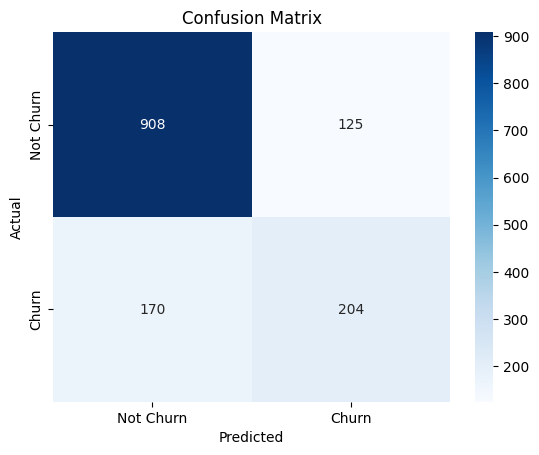

In [77]:
cm = confusion_matrix(y_test, y_pred1)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

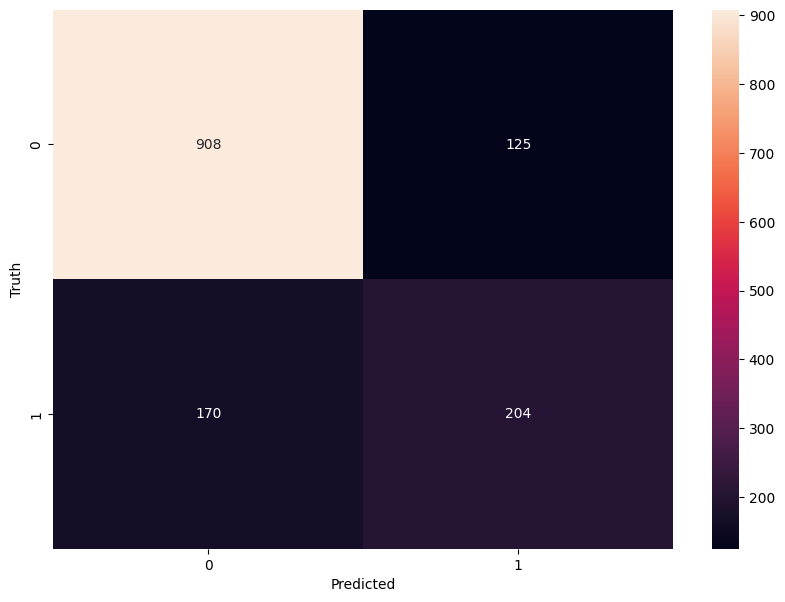

In [76]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [78]:
print(accuracy_score(y_test,y_pred1))

0.7903340440653873


## Our model predicts with 79 % Accuracy
## WE can increase accuracy by
1) Using more hidden layers and inc epochs
2_)